In [1]:
import pandas as pd
import numpy as np

In [238]:
train = pd.DataFrame(pd.read_csv('data/train.csv')) #(419487, 17)

test = pd.DataFrame(pd.read_csv('data/test.csv')) #(179781, 16)

In [249]:
test.shape

(179781, 16)

In [250]:
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419487 entries, 0 to 419486
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     419487 non-null  int64  
 1   DATE_DEPARTURE_UTC     419487 non-null  object 
 2   DATE_ARRIVAL_UTC       419487 non-null  object 
 3   DATE_DEPARTURE_LCL     419487 non-null  object 
 4   DATE_ARRIVAL_LCL       419487 non-null  object 
 5   ORIGIN                 419487 non-null  object 
 6   ORIGIN_AIRPORT_ID      419487 non-null  int64  
 7   DEST                   419487 non-null  object 
 8   DEST_AIRPORT_ID        419487 non-null  int64  
 9   TAIL_NUM               419487 non-null  object 
 10  OP_CARRIER             419487 non-null  object 
 11  OP_CARRIER_AIRLINE_ID  419487 non-null  int64  
 12  OP_CARRIER_FL_NUM      419487 non-null  int64  
 13  DISTANCE               401869 non-null  float64
 14  CANCELLED              419487 non-nu

0    0.851736
1    0.148264
Name: ARR_DEL15, dtype: float64
0.0    0.554303
NaN    0.349999
1.0    0.095698
Name: DEP_DEL15, dtype: float64
0    1.0
Name: CANCELLED, dtype: float64


count                  419487
unique                  29661
top       2020-01-09 11:55:00
freq                       52
Name: DATE_DEPARTURE_UTC, dtype: object

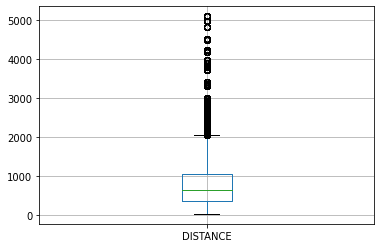

In [59]:
print(train['ARR_DEL15'].value_counts(dropna=False, normalize=True))
print(train['DEP_DEL15'].value_counts(dropna=False, normalize=True)) # we can go with 3 categories
print(train['CANCELLED'].value_counts(dropna=False, normalize=True)) #to be delete

#same info
train['OP_CARRIER'].nunique() #17
train['OP_CARRIER_AIRLINE_ID'].unique() #17

train['OP_CARRIER_FL_NUM'].nunique() #6715
train['TAIL_NUM'].nunique() #5376

train['ORIGIN'].nunique() #351
train['ORIGIN_AIRPORT_ID'].nunique() #351

train['DEST'].nunique() #350
train['DEST_AIRPORT_ID'].nunique() #350
train['DEST'].unique()

train['DISTANCE'].describe()
train[['DISTANCE']].boxplot();

train['DATE_DEPARTURE_UTC'].describe()

In [57]:
first_list = ['DISTANCE', 'DEP_DEL15', 'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC', 'DATE_DEPARTURE_LCL', 'DATE_ARRIVAL_LCL']

In [58]:
train[first_list].corr(method='pearson')

,DISTANCE,DEP_DEL15
DISTANCE,1.00000,0.02155
DEP_DEL15,0.02155,1.00000


In [240]:
#Feature engineering
import datetime as dt
import category_encoders as ce

def create_columns(_df):
    mod_df = _df.copy()
    
    mod_df.drop(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CANCELLED'], inplace = True, axis = 1)
    
    #transform string to datetime
    mod_df['DATE_DEPARTURE_UTC_ts'] = pd.to_datetime(mod_df['DATE_DEPARTURE_UTC'])
    mod_df['DATE_ARRIVAL_UTC_ts'] = pd.to_datetime(mod_df['DATE_ARRIVAL_UTC'])
    mod_df['DATE_DEPARTURE_LCL_ts'] = pd.to_datetime(mod_df['DATE_DEPARTURE_LCL'])
    mod_df['DATE_ARRIVAL_LCL_ts'] = pd.to_datetime(mod_df['DATE_ARRIVAL_LCL'])

    #duration of the flight
    mod_df['Duration_UTC'] = (mod_df['DATE_ARRIVAL_UTC_ts'] - mod_df['DATE_DEPARTURE_UTC_ts']).dt.seconds/60

    #Federal holidays
    mod_df['NewYear_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('01-01').map({True: 1, False: 0})
    mod_df['MartinLutherKingDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('01-20').map({True: 1, False: 0})
    mod_df['PresidentsDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('02-17').map({True: 1, False: 0})
    mod_df['MemorialDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('05-25').map({True: 1, False: 0})
    mod_df['IndependenceDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('07-04').map({True: 1, False: 0})
    mod_df['ColumbusDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('10-12').map({True: 1, False: 0})
    mod_df['VeteransDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('11-11').map({True: 1, False: 0})
    mod_df['ThanksgivingDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('11-26').map({True: 1, False: 0})
    mod_df['ChristmasDay_Flag'] = mod_df['DATE_DEPARTURE_UTC'].str.contains('12-25').map({True: 1, False: 0})
    
    #NaN values
    mod_df['DEP_DEL15_cat'] = mod_df['DEP_DEL15'].fillna(2).astype('category').map({1: 'delayed', 0: 'not delayed', 2: 'unknown'})
   
    mod_df = mod_df.join(pd.get_dummies(mod_df['DEP_DEL15_cat']))

    return mod_df
    
train_adj = create_columns(train)    
train_adj.columns



#if mod_df['DATE_DEPARTURE_LCL_ts']


#DEP_DEL15

#mod_df.head()
#(mod_df['DATE_DEPARTURE_LCL_ts'].dt.month == 1).value_counts()
#mod_df['DATE_DEPARTURE_LCL_ts'].dt.date

#mod_df['DATE_DEPARTURE_UTC'].str.contains('01-01').map({True: 1, False: 0}).value_counts()



#mod_df['DATE_DEPARTURE_LCL_ts'].dt.day
#Divide the dataset into correct types
#Create a flight duration column (Use UTC times)
#Divide timestamps into times of day, e.g morning, afternoon, night (use local times)
#Day of the week
#Holydays - 0, 1
#Look into delay of departure 

Index(['ID', 'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC', 'DATE_DEPARTURE_LCL',
       'DATE_ARRIVAL_LCL', 'ORIGIN', 'DEST', 'TAIL_NUM', 'OP_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'DISTANCE', 'DEP_DEL15',
       'ARR_DEL15', 'DATE_DEPARTURE_UTC_ts', 'DATE_ARRIVAL_UTC_ts',
       'DATE_DEPARTURE_LCL_ts', 'DATE_ARRIVAL_LCL_ts', 'Duration_UTC',
       'NewYear_Flag', 'MartinLutherKingDay_Flag', 'PresidentsDay_Flag',
       'MemorialDay_Flag', 'IndependenceDay_Flag', 'ColumbusDay_Flag',
       'VeteransDay_Flag', 'ThanksgivingDay_Flag', 'ChristmasDay_Flag',
       'DEP_DEL15_cat', 'not delayed', 'delayed', 'unknown'],
      dtype='object')

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#sort by DATE_DEPARTURE_UTC_ts
train_adj = train_adj.sort_values(by="DATE_DEPARTURE_UTC_ts")

#features to be used in the baseline model
features_baseline = ['Duration_UTC', 'NewYear_Flag', 'MartinLutherKingDay_Flag','not delayed', 'delayed', 'unknown']

X = train_adj[features_baseline]
y = train_adj['ARR_DEL15']

X_train = X.head(294487)
X_test = X.tail(125000)

y_train = y.head(294487)
y_test =  y.tail(125000)

#logist regression
logit_clf = LogisticRegression()
logit_clf.fit(X_train, y_train)
score_train = logit_clf.score(X_train, y_train) #0.9007426473834159
score_test = logit_clf.score(X_test, y_test) #0.902288
logit_clf.predict_proba(X_test).T[1]

print(score_train)
print(score_test)





0.9007426473834159
0.902288


In [212]:
#logist regression
logit_clf = LogisticRegression()
logit_clf.fit(X, y)
score_train = logit_clf.score(X, y) #0.9012269748526176
print(score_train)


0.9012269748526176


In [244]:
#test
test_adj = create_columns(test)

test_X = test_adj[features_baseline]

pred = pd.DataFrame(logit_clf.predict_proba(test_X).T[1], columns = ['ARR_DEL15'])

pred['ID'] = test_adj.ID
pred.set_index('ID', inplace = True)

In [248]:
pred.to_csv('data/baseline.csv')

In [247]:
test_X.shape

(179781, 6)